JUAN FERNANDO GAVIRIA
PREDICCIÓN EN BASE AL DATASET DEL TITANIC

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [5]:
# Realizamos lectura de los Datos para el análisis exploratorio, cargando 50 registros

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Resumen de valores nulos
print(Datos.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


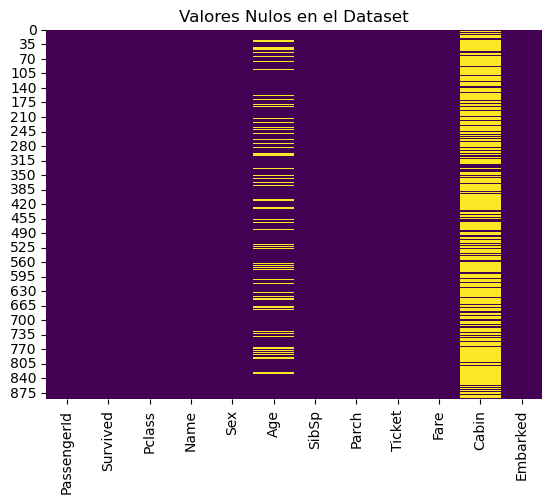

In [11]:
# Heatmap de valores nulos, para identificar patrones de valores nulos.
sns.heatmap(Datos.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos en el Dataset')
plt.show()

In [13]:
# Descripción de los datos
print(Datos.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [15]:
# Identificar valores faltantes
missing_values = Datos.isnull().sum()
missing_percentage = (missing_values / len(Datos)) * 100
missing_summary = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje Faltante (%)': missing_percentage
}).sort_values(by='Porcentaje Faltante (%)', ascending=False)
print(missing_summary)

             Valores Faltantes  Porcentaje Faltante (%)
Cabin                      687                77.104377
Age                        177                19.865320
Embarked                     2                 0.224467
PassengerId                  0                 0.000000
Survived                     0                 0.000000
Pclass                       0                 0.000000
Name                         0                 0.000000
Sex                          0                 0.000000
SibSp                        0                 0.000000
Parch                        0                 0.000000
Ticket                       0                 0.000000
Fare                         0                 0.000000


In [31]:
print(Datos.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [35]:
# Imputar valores faltantes en 'Age' con la mediana
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].median())

In [37]:
# Imputar valores faltantes en 'Embarked' con la moda
Datos['Embarked'] = Datos['Embarked'].fillna(Datos['Embarked'].mode()[0])

In [39]:
# Convertir variables categóricas a numéricas
# Sexo: 'male' -> 0, 'female' -> 1
Datos['Sex'] = Datos['Sex'].map({'male': 0, 'female': 1})

In [41]:
# Puerto de embarque: 'C' -> 0, 'Q' -> 1, 'S' -> 2
Datos['Embarked'] = Datos['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [43]:
# Verificar que no queden valores faltantes
print(Datos.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [45]:
# Visualizar los primeros registros del dataset limpio
print(Datos.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interés:
Sobrevivencia: Si la persona sobrevivió o no (0 = no sobrevivió, 1 = sobrevivió).

3.1 Analizar la variable objetivo (Survived)

3.2 Seleccionar características relevantes

In [47]:
# Característica de interés: Sobrevivencia
# Ver la distribución de la variable objetivo 'Survived' (sobrevivencia)
print(Datos['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [49]:
# Muestra los primeros 40 registros de la variable objetivo 'Survived'
print(Datos[['Survived']].head(40))

    Survived
0          0
1          1
2          1
3          1
4          0
5          0
6          0
7          0
8          1
9          1
10         1
11         1
12         0
13         0
14         0
15         1
16         0
17         1
18         0
19         1
20         0
21         1
22         1
23         1
24         0
25         1
26         0
27         0
28         1
29         0
30         0
31         1
32         1
33         0
34         0
35         0
36         1
37         0
38         0
39         1


In [53]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numerical_data = Datos.select_dtypes(include=[np.number])

In [55]:
# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numerical_data.corr()

In [57]:
# Mostrar la correlación de las variables con la variable objetivo 'Survived'
print(correlation_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Name: Survived, dtype: float64


In [59]:
# Seleccionar las 5 características más correlacionadas con la supervivencia
top_features = correlation_matrix['Survived'].sort_values(ascending=False).head(6)

In [61]:
# Mostrar las características seleccionadas
print("Características más relevantes para predecir la supervivencia:")
print(top_features)

Características más relevantes para predecir la supervivencia:
Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Name: Survived, dtype: float64


In [63]:
# Selección univariante usando un test chi-cuadrado (para variables categóricas)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
# Filtramos las características numéricas y categóricas para el análisis
X = Datos.drop(columns=['Survived', 'Name', 'Ticket'])  # Eliminar la columna objetivo y otras no numéricas
y = Datos['Survived']

In [67]:
# Selección de las 5 características más relevantes usando el test chi-cuadrado
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

In [69]:
# Mostrar las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Características seleccionadas por el test chi-cuadrado:")
print(selected_features)

Características seleccionadas por el test chi-cuadrado:
       Feature        Score
6         Fare  4518.319091
2          Sex   170.348127
1       Pclass    30.873699
3          Age    21.649163
7     Embarked    10.202525
5        Parch    10.097499
0  PassengerId     3.312934
4        SibSp     2.581865


Paso 4: Dividir el dataset en Train y Test

In [71]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (Y)
X = Datos.drop('Survived', axis=1)  # Eliminar la columna de la variable objetivo
Y = Datos['Survived']  # La variable objetivo es 'Survived'

# Dividir el dataset en conjuntos de entrenamiento (train) y prueba (test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# Ver los primeros registros de X_train y Y_train
print(X_train.head())
print(Y_train.head())


     PassengerId  Pclass                                               Name  \
671          672       1                             Davidson, Mr. Thornton   
417          418       2                      Silven, Miss. Lyyli Karoliina   
634          635       3                                 Skoog, Miss. Mabel   
323          324       2  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...   
379          380       3                        Gustafsson, Mr. Karl Gideon   

     Sex   Age  SibSp  Parch      Ticket    Fare  Embarked  
671    0  31.0      1      0  F.C. 12750  52.000         2  
417    1  18.0      0      2      250652  13.000         2  
634    1   9.0      3      2      347088  27.900         2  
323    1  22.0      1      1      248738  29.000         2  
379    0  19.0      0      0      347069   7.775         2  
671    0
417    1
634    0
323    1
379    0
Name: Survived, dtype: int64


Paso 5: Entrenar el modelo de regresión logística

In [77]:
from sklearn.preprocessing import LabelEncoder

# Convertir la columna 'Sex' a numérica
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

#  entrenamiento del modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)


In [81]:
X = pd.get_dummies(Datos, drop_first=True)  # Esto convierte variables categóricas en variables dummy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)


In [83]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [85]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")  

# Entrenar el modelo
modelo_regresion.fit(X_train, Y_train)


LogisticRegression(solver='liblinear')

In [87]:
# Hacer predicciones usando el modelo entrenado
Prediccion = modelo_regresion.predict(X_test)

In [89]:
# Ver las primeras predicciones
print(Prediccion[:10])

[1 1 0 0 1 1 1 0 0 1]


Paso 6: Evaluar el desempeño del modelo

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       137
           1       1.00      0.98      0.99        86

    accuracy                           0.99       223
   macro avg       0.99      0.99      0.99       223
weighted avg       0.99      0.99      0.99       223



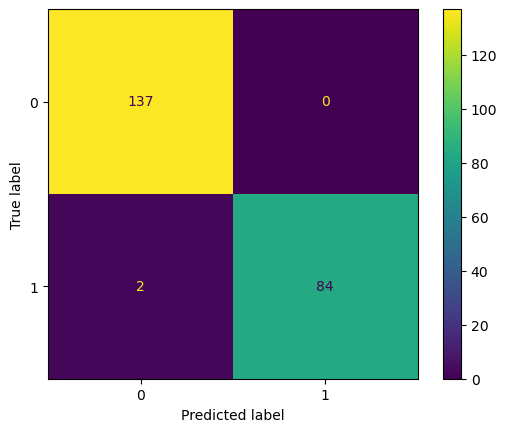

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluar el desempeño del modelo con el conjunto de test
print(classification_report(Y_test, Prediccion))

# Matriz de confusión
cm = confusion_matrix(Y_test, Prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Mostrar el gráfico de la matriz de confusión
import matplotlib.pyplot as plt
plt.show()


Paso 7: Gráficas adicionales (curva ROC)

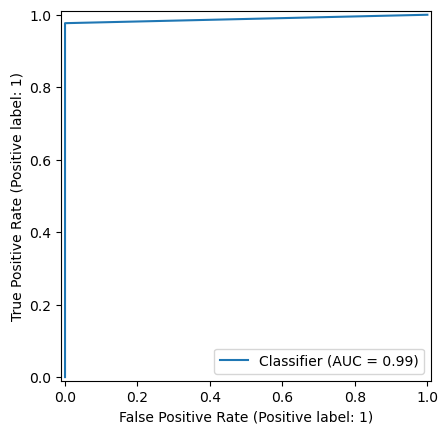

In [93]:
from sklearn.metrics import RocCurveDisplay

# Curva ROC
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

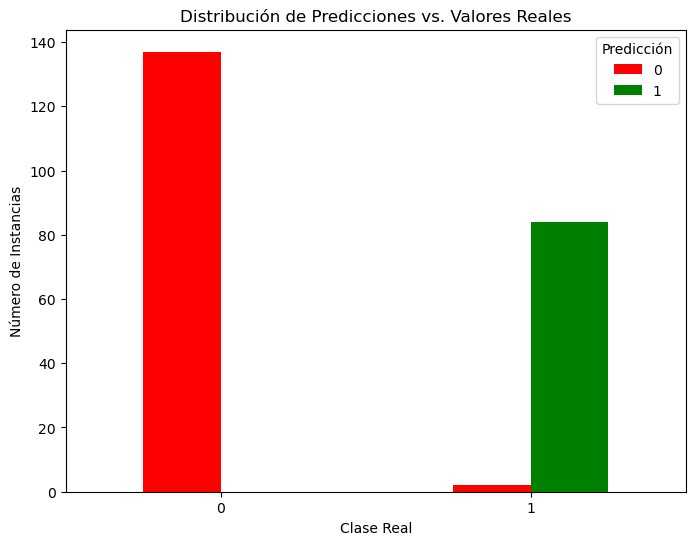

In [97]:
import pandas as pd

# Crear un DataFrame con las predicciones y las etiquetas verdaderas
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicción': Prediccion})

# Contar las ocurrencias de cada combinación
counts = pred_df.groupby(['Actual', 'Predicción']).size().unstack(fill_value=0)

# Graficar la comparación
counts.plot(kind='bar', stacked=False, color=['red', 'green'], figsize=(8, 6))
plt.title('Distribución de Predicciones vs. Valores Reales')
plt.xlabel('Clase Real')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=0)
plt.show()


PASO 8. Interpretar, analizar y documentar los resultados obtenidos

Precisión: La precisión mide la proporción de predicciones positivas verdaderas (supervivientes) entre todas las predicciones positivas realizadas. En este caso, la precisión es aproximadamente 0.99, lo que significa que de todas las personas que el modelo predijo como supervivientes, el 99% lo fueron en realidad. Esto indica una alta exactitud en las predicciones positivas.

Recall (Sensibilidad): El recall mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales (supervivientes) en el conjunto de datos. El recall para la clase "superviviente" es 1.00, indicando que el modelo identificó correctamente al 100% de los supervivientes. Esto significa que el modelo no dejó de identificar a ningún superviviente.

F1-score: El F1-score es la media armónica de la precisión y el recall. Proporciona una única puntuación que equilibra ambas métricas. Un F1-score de aproximadamente 0.99 indica un excelente equilibrio entre precisión y recall, reflejando un alto rendimiento general del modelo.